# Flight Delay Prediction


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
%matplotlib inline

#### Reading data from csv file

In [2]:
df = pd.read_csv('./DataSets/Flight-Delay-Prediction/flights.csv')
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_4912\3570108130.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../DataSets/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Data Analysis

In [3]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
df.shape

(5819079, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
df = df[0:50000]

#### --> Checking for missing values

In [7]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_REASON    48862
WEATHER_DELAY          34592
LATE_AIRCRAFT_DELAY    34592
AIRLINE_DELAY          34592
SECURITY_DELAY         34592
AIR_SYSTEM_DELAY       34592
AIR_TIME                1247
ARRIVAL_DELAY           1247
ELAPSED_TIME            1247
WHEELS_ON               1161
TAXI_IN                 1161
ARRIVAL_TIME            1161
TAXI_OUT                1127
WHEELS_OFF              1127
DEPARTURE_DELAY         1104
DEPARTURE_TIME          1104
TAIL_NUMBER               59
SCHEDULED_DEPARTURE        0
CANCELLED                  0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
SCHEDULED_ARRIVAL          0
DIVERTED                   0
ORIGIN_AIRPORT             0
DISTANCE                   0
DESTINATION_AIRPORT        0
MONTH                      0
SCHEDULED_TIME             0
YEAR                       0
dtype: int64

#### -->Check Correlation

<AxesSubplot:>

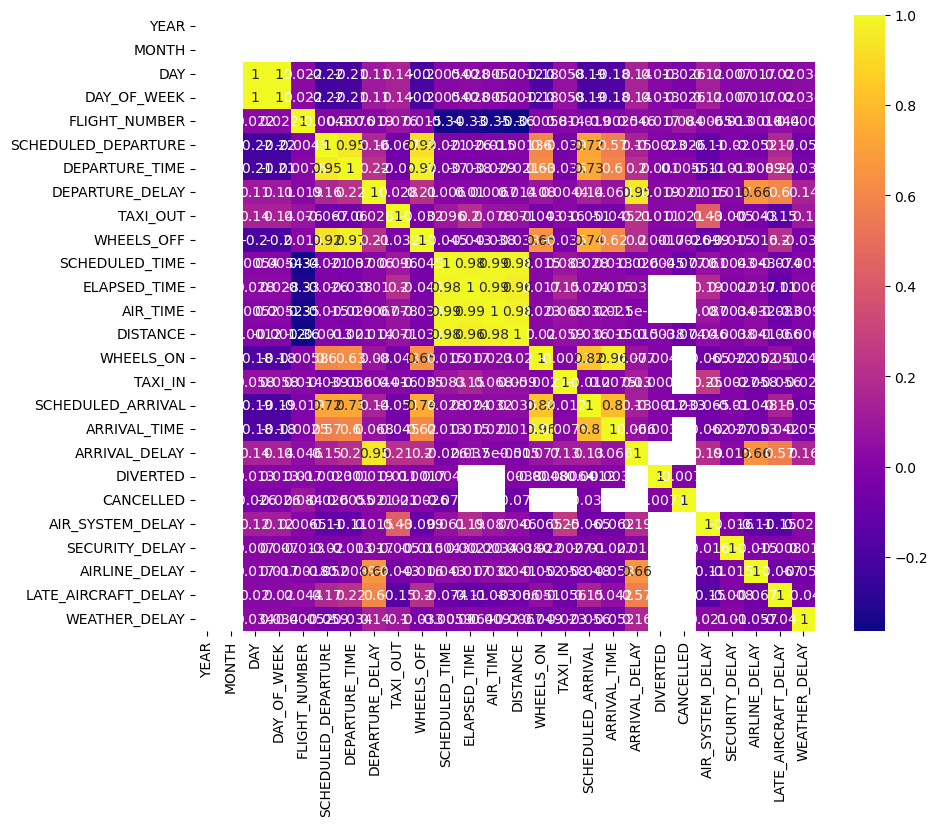

In [8]:
# Check for Corelation between Features
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(),yticklabels=True,cbar=True,annot=True,cmap='plasma')

- For missing values in columns, we'll check their correlation with dependent variable and handle them.

In [9]:
df.corr()['ARRIVAL_DELAY'].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.946841
AIRLINE_DELAY          0.656492
LATE_AIRCRAFT_DELAY    0.571378
TAXI_OUT               0.212254
DEPARTURE_TIME         0.204405
WHEELS_OFF             0.201576
AIR_SYSTEM_DELAY       0.190652
WEATHER_DELAY          0.163779
SCHEDULED_DEPARTURE    0.146855
DAY_OF_WEEK            0.141810
DAY                    0.141810
SCHEDULED_ARRIVAL      0.127940
TAXI_IN                0.125027
WHEELS_ON              0.077232
ARRIVAL_TIME           0.065861
FLIGHT_NUMBER          0.046094
ELAPSED_TIME           0.036524
SECURITY_DELAY         0.014935
AIR_TIME              -0.000015
DISTANCE              -0.015420
SCHEDULED_TIME        -0.026053
YEAR                        NaN
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

- We can drop columns with missing values and least related with our dependent values, and fill other missing values with mean value.

In [10]:
df = df.drop(['FLIGHT_NUMBER','ELAPSED_TIME','SCHEDULED_DEPARTURE','AIR_TIME','DISTANCE','SCHEDULED_TIME','AIR_SYSTEM_DELAY','SCHEDULED_ARRIVAL'],axis=1)

In [11]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_REASON    48862
WEATHER_DELAY          34592
LATE_AIRCRAFT_DELAY    34592
AIRLINE_DELAY          34592
SECURITY_DELAY         34592
ARRIVAL_DELAY           1247
ARRIVAL_TIME            1161
TAXI_IN                 1161
WHEELS_ON               1161
TAXI_OUT                1127
WHEELS_OFF              1127
DEPARTURE_DELAY         1104
DEPARTURE_TIME          1104
TAIL_NUMBER               59
MONTH                      0
DESTINATION_AIRPORT        0
ORIGIN_AIRPORT             0
DIVERTED                   0
CANCELLED                  0
AIRLINE                    0
DAY_OF_WEEK                0
DAY                        0
YEAR                       0
dtype: int64

- We can drop unrelated categorical columns fill missing values in numerical columns with mean.

In [12]:
df = df.drop(['TAIL_NUMBER','CANCELLATION_REASON','WHEELS_ON','TAXI_IN'],axis=1)

In [13]:
# Filling missing values with mean values
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(df.WEATHER_DELAY.mean())
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(df.AIRLINE_DELAY.mean())
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(df.SECURITY_DELAY.mean())
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(df.LATE_AIRCRAFT_DELAY.mean())
df['WHEELS_OFF'] = df['WHEELS_OFF'].fillna(df.WHEELS_OFF.mean())
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(df.TAXI_OUT.mean())
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].fillna(df.DEPARTURE_DELAY.mean())
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(df.DEPARTURE_TIME.mean())
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].fillna(df.ARRIVAL_TIME.mean())
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(df.ARRIVAL_DELAY.mean())

In [14]:
df.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

- Here we can assume the dependent variable(predicting value) is 'ARRIVAL_DELAY', but it consists of continous values, which describes the delay of arrival time.
- We need to draw it in range between 0 and 1 to decide if the flight will be delayed or not. 0 if flight is not delayed and 1 if flight is delayed.
- We can create a new feature 'FLIGHT_DELAY' for it.

In [15]:
FLIGHT_DELAYED=[]
for i in df['ARRIVAL_DELAY']:
    if i > 10:
        FLIGHT_DELAYED.append(1)
    else:
        FLIGHT_DELAYED.append(0) 

In [16]:
df['FLIGHT_DELAYED'] = FLIGHT_DELAYED

In [17]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_DELAYED
0,2015,1,1,4,AS,ANC,SEA,2354.0,-11.0,21.0,15.0,408.0,-22.0,0,0,0.100078,18.305945,22.047832,1.937046,0
1,2015,1,1,4,AA,LAX,PBI,2.0,-8.0,12.0,14.0,741.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
2,2015,1,1,4,US,SFO,CLT,18.0,-2.0,16.0,34.0,811.0,5.0,0,0,0.100078,18.305945,22.047832,1.937046,0
3,2015,1,1,4,AA,LAX,MIA,15.0,-5.0,15.0,30.0,756.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
4,2015,1,1,4,AS,SEA,ANC,24.0,-1.0,11.0,35.0,259.0,-21.0,0,0,0.100078,18.305945,22.047832,1.937046,0


In [18]:
df['FLIGHT_DELAYED'].value_counts()

0    31003
1    18997
Name: FLIGHT_DELAYED, dtype: int64

#### Data Visualisation

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='DEPARTURE_DELAY'>

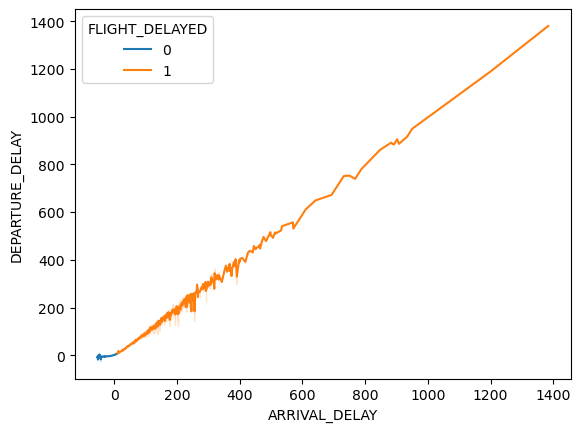

In [19]:
#Compare betwEen scheduled and actual arrival time
sb.lineplot(data=df, x="ARRIVAL_DELAY", y="DEPARTURE_DELAY", hue="FLIGHT_DELAYED")

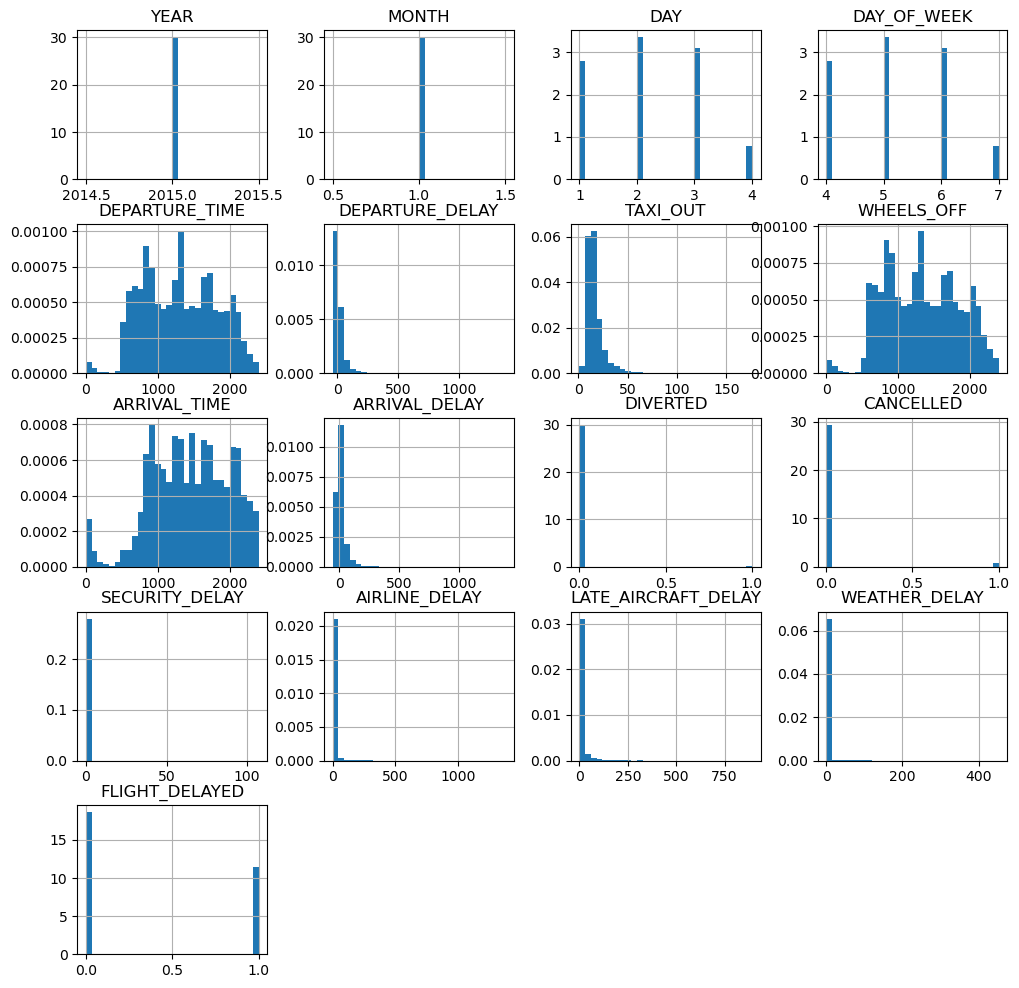

In [20]:
# Visualize the variable distribution with histograms
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

<AxesSubplot:xlabel='AIRLINE', ylabel='count'>

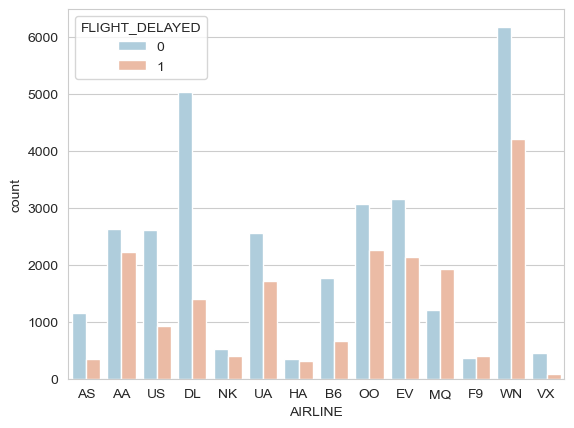

In [21]:
sb.set_style('whitegrid')
sb.countplot(x='AIRLINE',hue= 'FLIGHT_DELAYED',data=df,palette='RdBu_r')

In [22]:
df['FLIGHT_DELAYED']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: FLIGHT_DELAYED, Length: 50000, dtype: int64

#### Feature Scaling

- We can remove features related to date and time as well as unwanted ones before building model.

In [23]:
df = df.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE'],axis=1)

In [24]:
df.head()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_DELAYED
0,2354.0,-11.0,21.0,15.0,408.0,-22.0,0,0,0.100078,18.305945,22.047832,1.937046,0
1,2.0,-8.0,12.0,14.0,741.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
2,18.0,-2.0,16.0,34.0,811.0,5.0,0,0,0.100078,18.305945,22.047832,1.937046,0
3,15.0,-5.0,15.0,30.0,756.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
4,24.0,-1.0,11.0,35.0,259.0,-21.0,0,0,0.100078,18.305945,22.047832,1.937046,0


In [25]:
df.shape

(50000, 13)

In [26]:
df.columns

Index(['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'FLIGHT_DELAYED'],
      dtype='object')

In [27]:
X = df.drop('FLIGHT_DELAYED',axis=1)
Y = df['FLIGHT_DELAYED']

In [28]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [29]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((35000, 12), (15000, 12), (35000,), (15000,))

In [30]:
# STANDARD SCALING the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
df.head()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_DELAYED
0,2354.0,-11.0,21.0,15.0,408.0,-22.0,0,0,0.100078,18.305945,22.047832,1.937046,0
1,2.0,-8.0,12.0,14.0,741.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
2,18.0,-2.0,16.0,34.0,811.0,5.0,0,0,0.100078,18.305945,22.047832,1.937046,0
3,15.0,-5.0,15.0,30.0,756.0,-9.0,0,0,0.100078,18.305945,22.047832,1.937046,0
4,24.0,-1.0,11.0,35.0,259.0,-21.0,0,0,0.100078,18.305945,22.047832,1.937046,0


### Model Building & Evaluation

- We will use ensemble modeling approach and compare different models for higher performance.

1) Logistic Regression
2) Naive Bayes
3) KNN
4) Support Vector Machines

#### 1) Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
lgr = LogisticRegression()
lgr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
Y_pred = lgr.predict(X_test)
lgr_acc = accuracy_score(Y_pred,Y_test)
print('Accuracy score for Logistic Regression: ',lgr_acc)

Accuracy score for Logistic Regression:  0.998


#### 2) Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train)

GaussianNB()

In [36]:
Y_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(Y_pred,Y_test)
print('Accuracy score for Naive Bayes: ',gnb_acc)

Accuracy score for Naive Bayes:  0.9558666666666666


#### 3)KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [38]:
Y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_pred,Y_test)
print('Accuracy score for KNN: ',knn_acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score for KNN:  0.9675333333333334


#### 4)Support Vector Machine

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [40]:
Y_pred = svc.predict(X_test)
svc_acc = accuracy_score(Y_pred,Y_test)
print('Accuracy score for SVM: ',svc_acc)

Accuracy score for SVM:  0.9914666666666667


### Comparing Models

In [41]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Naive Bayes', 'KNN',
               'Support Vector Machine'],
    'Score': [
        lgr_acc, 
        gnb_acc,  
        knn_acc, 
        svc_acc,
    ]})
print("----- Accuracy Scores-----")
models.sort_values(by='Score', ascending=False)

----- Accuracy Scores-----


,Model,Score
0,Logistic Regression,0.998000
3,Support Vector Machine,0.991467
2,KNN,0.967533
1,Naive Bayes,0.955867


- We can come to conclusion that,
Logistic Regression Model is best suitable for this project.